In [7]:
from re import I
from keras.layers import Dense, Flatten
from keras.models import Model

# vgg19
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
from glob import glob


In [8]:

IMAGE_SIZE = [150,150]

trainImagesFolder = r"C:\Users\ADdetection\Downloads\2_class\train"
validationImagesFolder = r"C:\Users\ADdetection\Downloads\2_class\val"

# data augmentation

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                    shear_range = 0.4,
                                    zoom_range= 0.4,
                                    rotation_range=0.4,
                                    horizontal_flip= True)


valid_datagen = ImageDataGenerator( rescale= 1. / 255)


train_data_set = train_datagen.flow_from_directory(trainImagesFolder,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='categorical')

                                                    
valid_data_set = valid_datagen.flow_from_directory(validationImagesFolder,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 1323 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [9]:
myVgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 
# include_top=False -> remove the last fully connected layes from the VGG19 , so we can add our own layers

for layer in myVgg.layers:
    layer.trainable = False

In [10]:

Classes = glob(r"C:\Users\ADdetection\Downloads\2_class\train/*")
print(Classes)

classesNum = len(Classes)
print ('Number of Classes : ')
print(classesNum)

['C:\\Users\\ADdetection\\Downloads\\2_class\\train\\ad', 'C:\\Users\\ADdetection\\Downloads\\2_class\\train\\mci']
Number of Classes : 
2


In [11]:

model = Sequential()
model.add(myVgg)
model.add(Flatten())
model.add(Dense(classesNum , activation='softmax'))

print (model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________
None


In [12]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint , EarlyStopping
checkpoint = ModelCheckpoint(r'C:\Users\ADdetection\Downloads\2_class\vgg19checkpoint.h5', 
                            monitor='accuracy',
                            verbose=1,
                            save_best_only=True)

earlystop = EarlyStopping(monitor='accuracy', patience=10 , verbose=1)                             

# fit the model (Training)

result = model.fit(train_data_set, validation_data=valid_data_set , epochs=15, verbose=1 , callbacks=[checkpoint,earlystop])

# plot accuracy 

Epoch 1/15
42/42 [==============================] - ETA: 0s - loss: 0.7027 - accuracy: 0.5797 
Epoch 1: accuracy improved from -inf to 0.57974, saving model to C:\Users\ADdetection\Downloads\2_class\vgg19checkpoint.h5
42/42 [==============================] - 494s 12s/step - loss: 0.7027 - accuracy: 0.5797 - val_loss: 0.5978 - val_accuracy: 0.6463
Epoch 2/15
42/42 [==============================] - ETA: 0s - loss: 0.6713 - accuracy: 0.6009 
Epoch 2: accuracy improved from 0.57974 to 0.60091, saving model to C:\Users\ADdetection\Downloads\2_class\vgg19checkpoint.h5
42/42 [==============================] - 491s 12s/step - loss: 0.6713 - accuracy: 0.6009 - val_loss: 0.5638 - val_accuracy: 0.7439
Epoch 3/15
42/42 [==============================] - ETA: 0s - loss: 0.6392 - accuracy: 0.6327 
Epoch 3: accuracy improved from 0.60091 to 0.63265, saving model to C:\Users\ADdetection\Downloads\2_class\vgg19checkpoint.h5
42/42 [==============================] - 487s 12s/step - loss: 0.6392 - accura

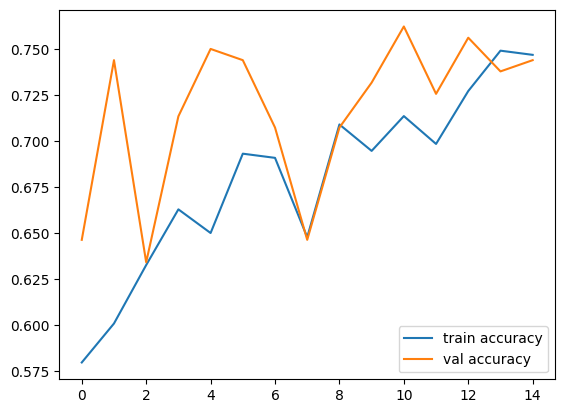

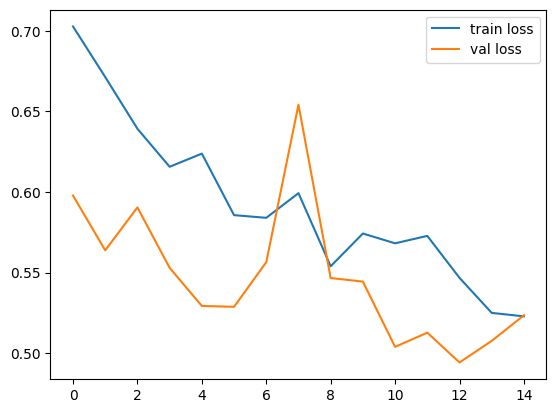

In [13]:
# plot accuracy 
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

# plot loss 
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()